# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования**

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению
исследовательского анализа.

Таким образом, моё исследование пройдёт в семь этапов:
* Обзор данных.
* Предобработка данных.
* Расчеты и добавление результатов в таблицу.
* Проведение анализа для Ленинградской области.
* Проведение анализа для Санкт-Петербурга.
* Различаются ли факторы, которые влияют на ценообразование стоимости квартир,
* Написание общего вывода.

### Изучим общую информацию

#### Первичный анализ данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# считываем данные из файла и определяем "\t" в качестве сепаратора
data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

##### Ознакамливаемся с данными

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

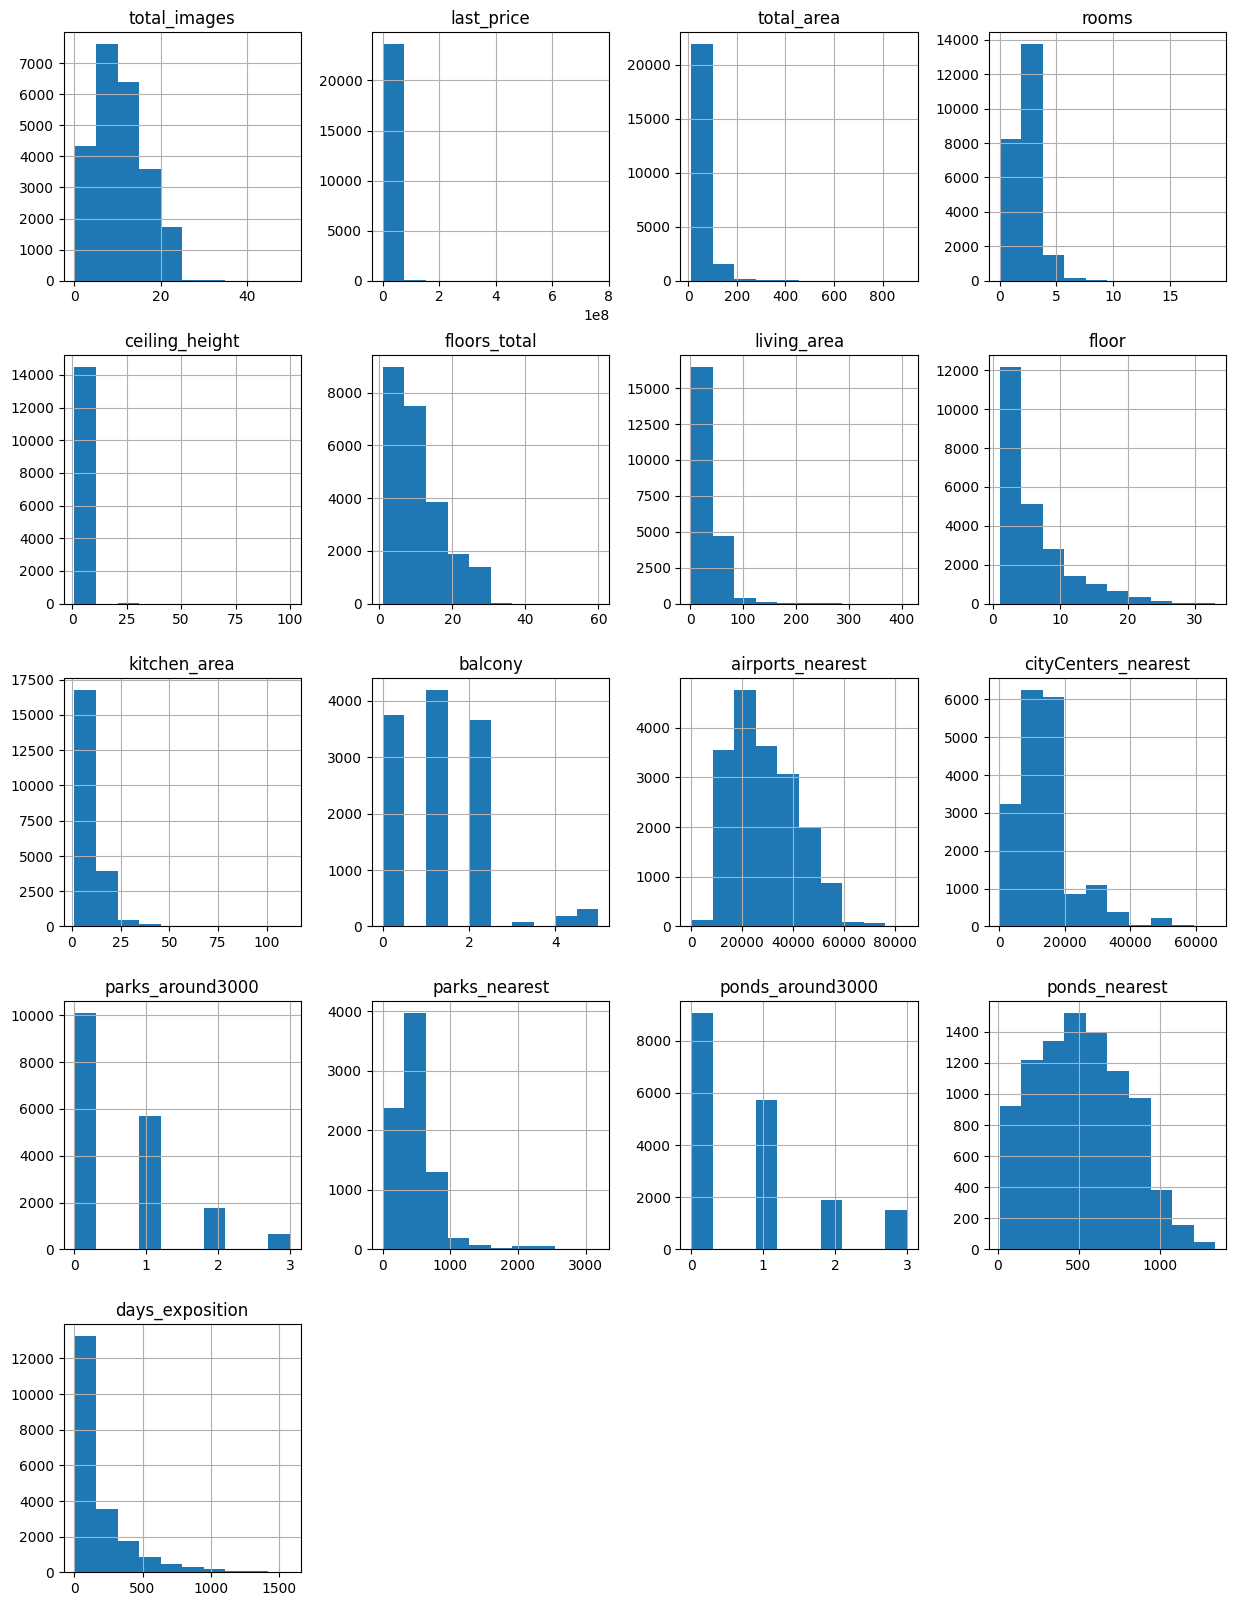

In [4]:
data.hist(figsize=(15, 20))
plt.show();

### Выполним предобработку данных

#### Поиск пропущенных значений

In [5]:
nan_sum = {}
for column in data.columns:
    nan_sum[column] = data[column].isna().sum()
    
{k: v for k, v in sorted(nan_sum.items(), key=lambda item: item[1], reverse=True)}

{'is_apartment': 20924,
 'parks_nearest': 15620,
 'ponds_nearest': 14589,
 'balcony': 11519,
 'ceiling_height': 9195,
 'airports_nearest': 5542,
 'cityCenters_nearest': 5519,
 'parks_around3000': 5518,
 'ponds_around3000': 5518,
 'days_exposition': 3181,
 'kitchen_area': 2278,
 'living_area': 1903,
 'floors_total': 86,
 'locality_name': 49,
 'total_images': 0,
 'last_price': 0,
 'total_area': 0,
 'first_day_exposition': 0,
 'rooms': 0,
 'floor': 0,
 'studio': 0,
 'open_plan': 0}

#### Заполним пропущенные значения там, где это возможно.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Логично предположить, что многие клиенты не имеющие балконов наверняка оставляли соответствующее поле пустым, поэтому можем заменить пропуски на нулевые значения.

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [8]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Видимо система не обнаружив парка и/или водоёма в окружности 3км оставляла в данных пропуск, можем заменить их на ноль.

In [9]:
data.loc[data['locality_name'].isna()].shape[0]

49

Пропущенных значений для 'locality_name' параметра всего 49. Это ~ 0.2% от всей выборки, выглядит так, что мы можем удалить объекты с таким показателем.

In [10]:
data = data.dropna(subset=['locality_name'])

Закономерности появления пропусков в параметрах: `'is_apartment'`,`'parks_nearest'`, `'ponds_nearest'`, `'ceiling_height'`, `'airports_nearest'`, `'cityCenters_nearest'`, `'kitchen_area'` ,`'living_area'`, `'floors_total'` не обнаружены.

#### Изменим тип данных

In [11]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S') 

Для более комфортной работы с датой следует привести её к виду `%Y.%m.%dT%H:%M:%S`

In [13]:
data['balcony'] = data['balcony'].astype(int)

In [14]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [15]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

В случае если параметр целочисленный (например кол-во балконов), то логичнее иметь его в виде int.

#### Работа с дубликатами

##### Проверяем и обрабатываем явные дубликаты

In [16]:
data.duplicated().sum()

0

##### Проверяем и обрабатываем неявные дубликаты

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городского типа ', 'городской ', 'при железнодорожной станции ', 
              'коттеджный ', 'станции '], '', regex=True)
)

В исходных данных явных дубликатов в данных не обнаружено, в то время как имелись неявные, в основном это связано с использованием букв "е" и "ё", а также расширенным названием некоторых населённых пунктов. Неявные дубликаты были приведены к единому виду путём замены "ё" на "е" и упрощением написания названий некоторых населённых пунктов.

### Добавьте в таблицу новые столбцы

Добавим к данным эквивалент цены в USD

In [19]:
data['price_usd'] = data['last_price'] * 0.016

Добавим к данным цену одного квадратного метра

In [20]:
data['sq_cost'] = round(data['price_usd'] / data['total_area'], 2)

Добавим к данным день публикации объявления (0 - понедельник, 1 - вторник и т. д.)

In [21]:
data['day'] = data['first_day_exposition'].dt.weekday

Добавим к данным месяц публикации объявления

In [22]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавим к данным год публикации объявления

In [23]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим к данным тип этажа квартиры (значения — «первый», «последний», «другой»)

In [24]:
def fl_type(row):
    
    floor = row['floor']
    total = row['floors_total']
    
    if floor == 1:
        return "первый"
    elif floor != 1 and floor == total:
        return "последний"
    else:
        return "другой"
    
data['floor_type'] = data.apply(fl_type, axis=1)   

Добавим к данным расстояние до центра города в километрах

In [25]:
data['km_to_center'] = round(data['cityCenters_nearest'] / 1000)





### Проведите исследовательский анализ данных

#### Изучим и опишем параметры

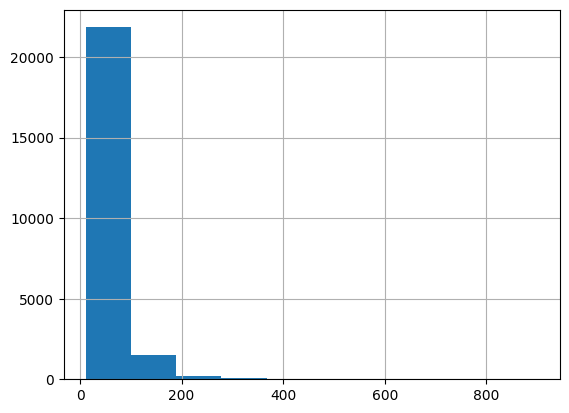

In [26]:
data['total_area'].hist()
plt.show();

Недвижимость с площадью от 35 до 50 метров встречается чаще всего.

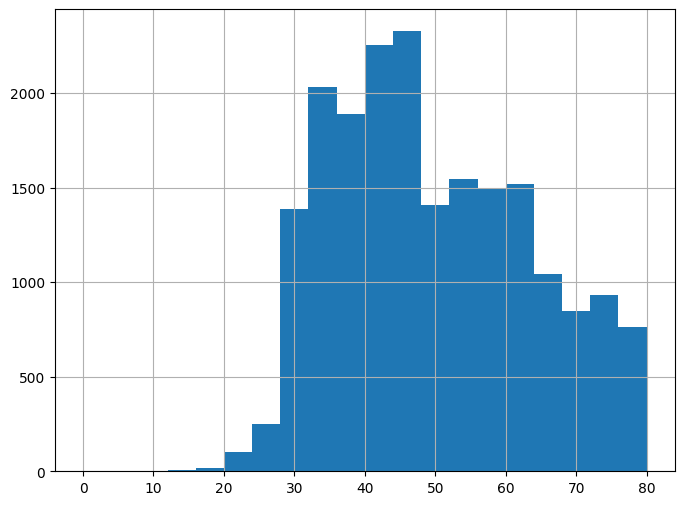

In [74]:
data = data.loc[data['total_area'] < 200]

data['total_area'].hist(bins=20, range=(0,80), figsize=(8,6))
plt.show();

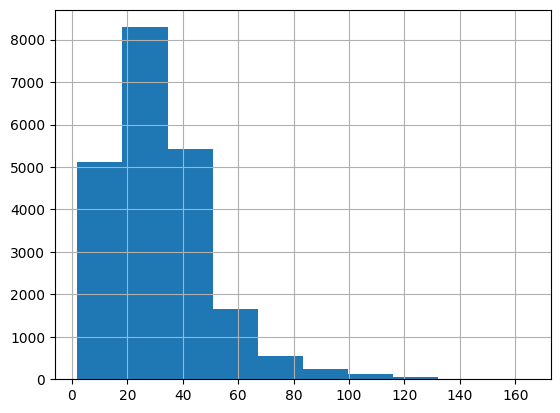

In [75]:
data['living_area'].hist()
plt.show();

Жилая зона с площадью от 15 до 20 метров встречается чаще всего, также наблюдается второй пик на уровне 25-35 метров.

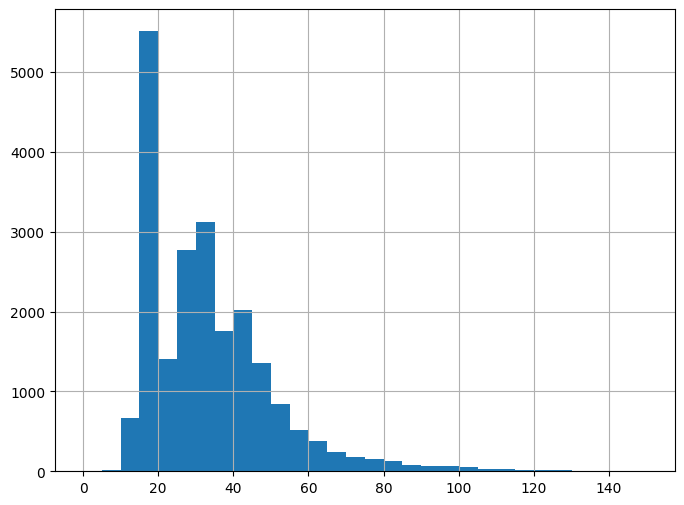

In [76]:
data['living_area'].hist(bins=30, range=(0, 150), figsize=(8,6))
plt.show();

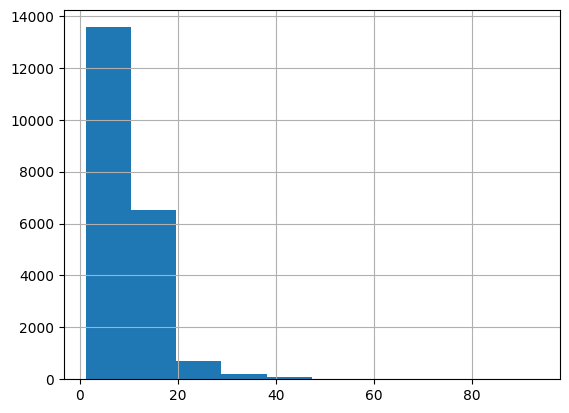

In [77]:
data['kitchen_area'].hist()
plt.show();

Площадь кухни встречается чаще всего в диапазоне от 5 до 10 метров.

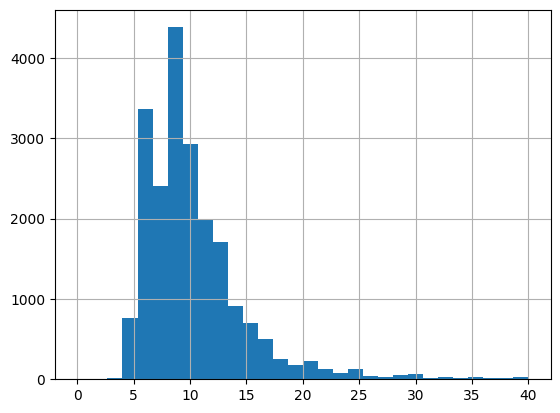

In [78]:
data['kitchen_area'].hist(bins=30, range=(0, 40))
plt.show();

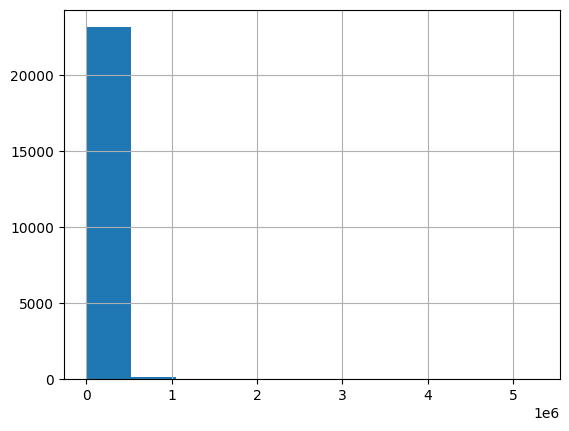

In [79]:
data['price_usd'].hist()
plt.show();

Большинство недвижимости торгуется в районе 50.000 - 75.000 $

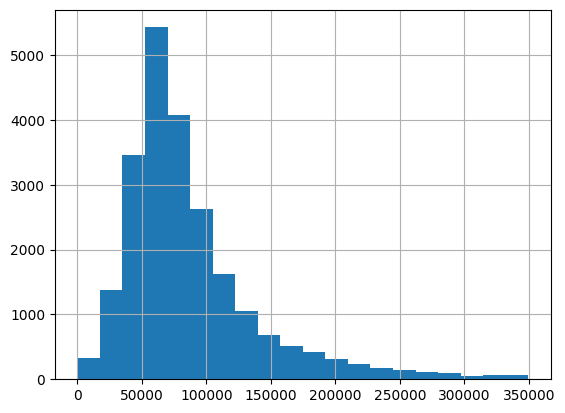

In [80]:
data.query('price_usd < 350000')['price_usd'].hist(bins=20)
plt.show();

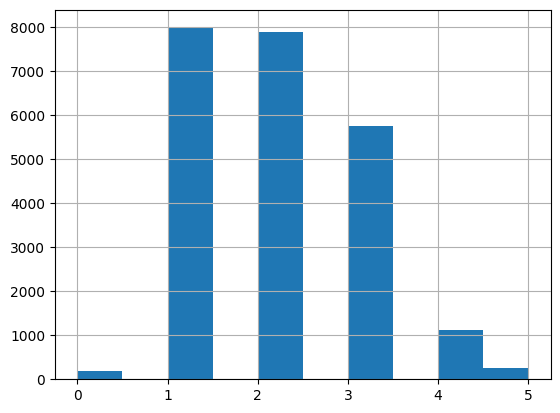

In [81]:
data['rooms'].hist()
plt.show();

Больше других вариантов, на рынке предствлено практически равное кол-во одно- и двухкомнатных объектов недвижимости. 

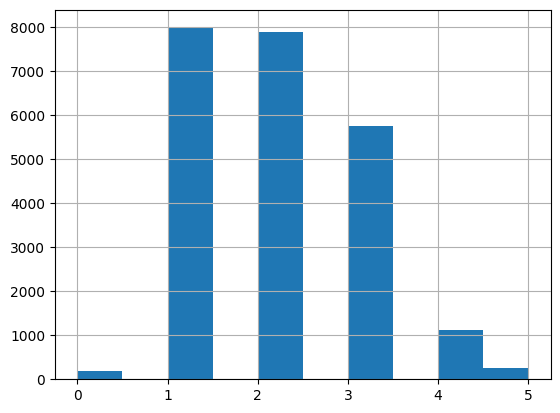

In [82]:
data['rooms'] = data['rooms'].where(data['rooms'] < 6)

data['rooms'].hist()
plt.show();

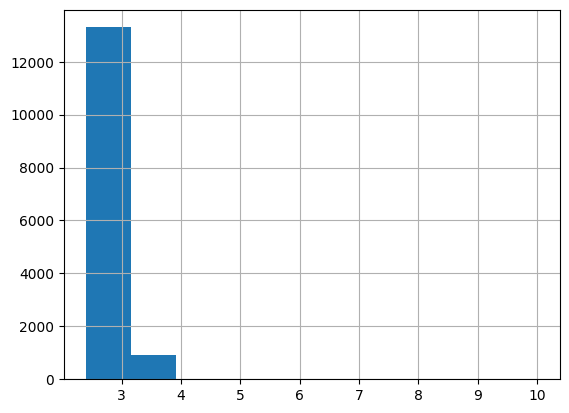

In [83]:
data['ceiling_height'].hist()
plt.show();

In [37]:
def new_ceiling_calc(row):
    hight = row['ceiling_height']
    
    if hight > 24:
        return hight / 10
    elif hight > 3.8 or hight < 2.4:
        return None
    else:
        return hight

data['ceiling_height'] = data.apply(new_ceiling_calc, axis=1)

Исключительное большинство объектов недвижимости имеют потолки ниже 3х метров.

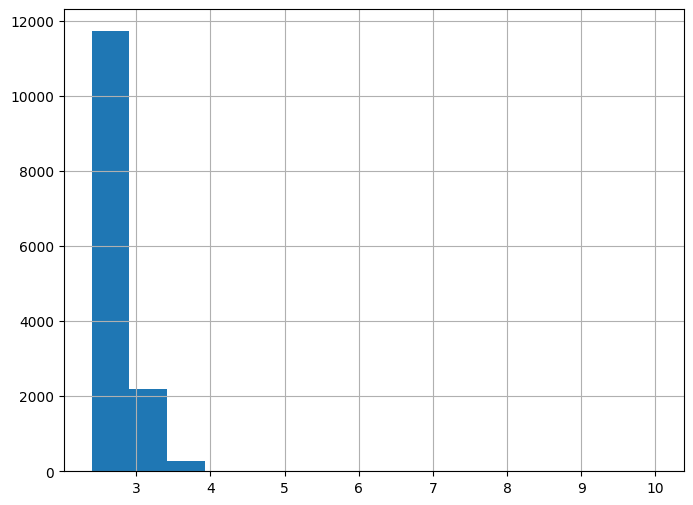

In [84]:
data['ceiling_height'].hist(bins=15, figsize=(8,6))
plt.show();

Большинство объектов недвижимости находятся между первым и последним этажами. Кол-во первых и последних этажей представлено практически в равном объеме.

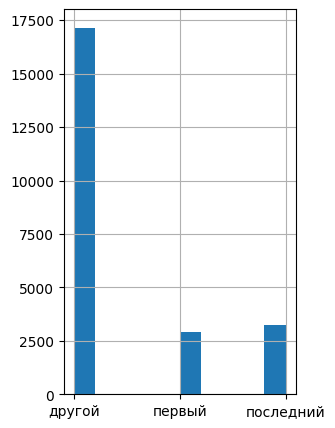

In [85]:
data['floor_type'].hist(figsize=(3,5))
plt.show();

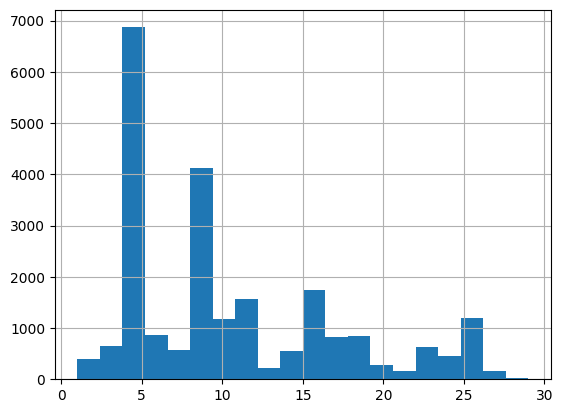

In [86]:
data['floors_total'].hist(bins=20)
plt.show();

In [41]:
data = data.loc[data['floors_total'] < 30]

В данных превалируют две группы квартир: пяти- и девятиэтажные.

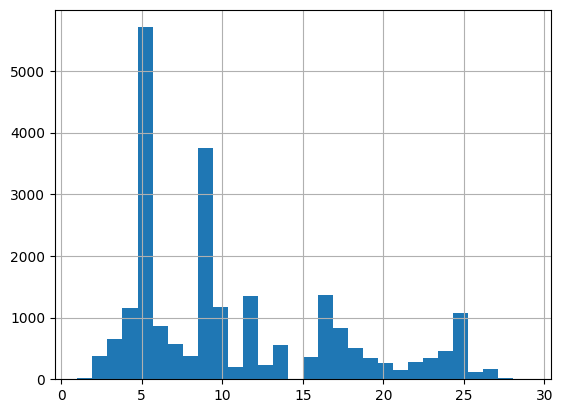

In [87]:
data['floors_total'].hist(bins=30)
plt.show();

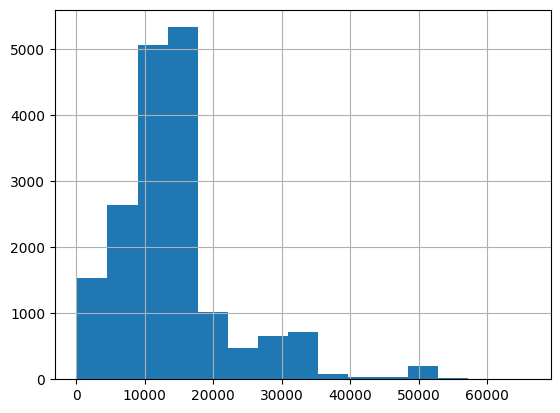

In [88]:
data['cityCenters_nearest'].hist(bins=15)
plt.show();

Большинство объектов недвижимости находятся на расстоянии 1.2-1.5 км от центра города.

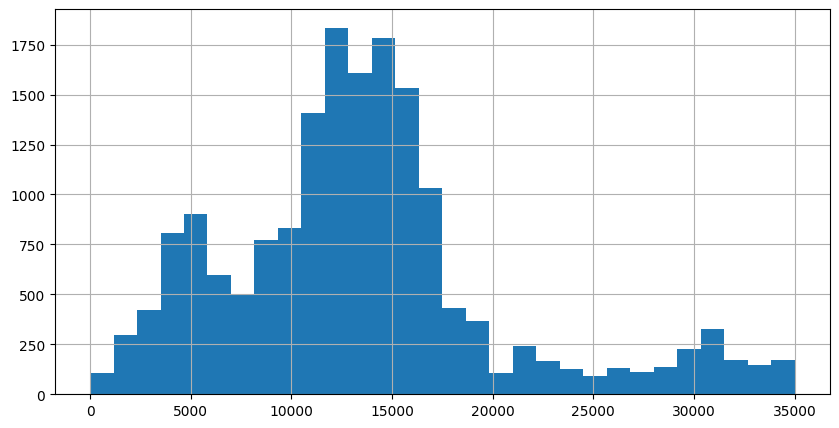

In [89]:
data['cityCenters_nearest'].hist(bins=30, range=(0,35000), figsize=(10,5))
plt.show();

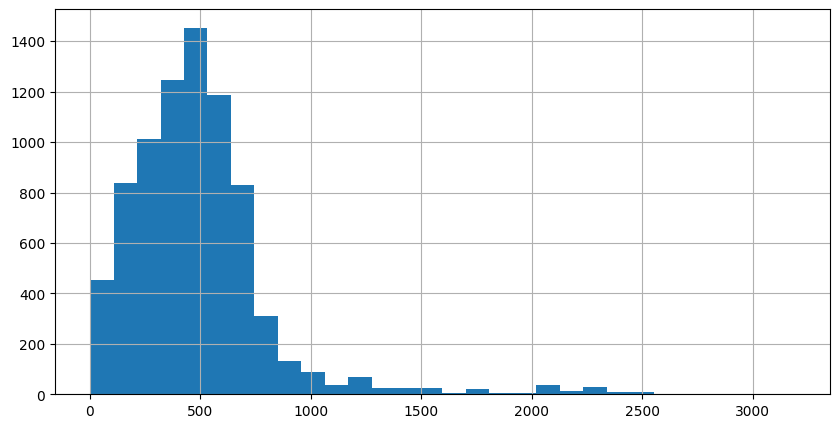

In [90]:
data['parks_nearest'].hist(bins=30, figsize=(10,5))
plt.show();

Большинство объектов недвижимости находятся на расстоянии около 0.5 км от парка.

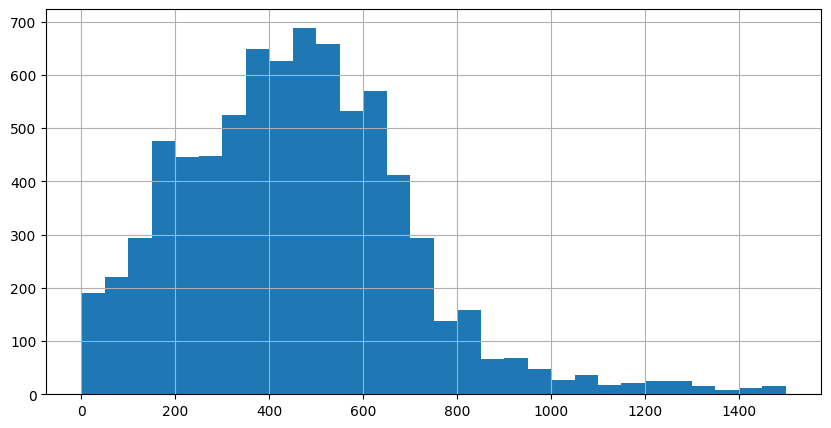

In [91]:
data['parks_nearest'].hist(bins=30, range=(0,1500), figsize=(10,5))
plt.show();

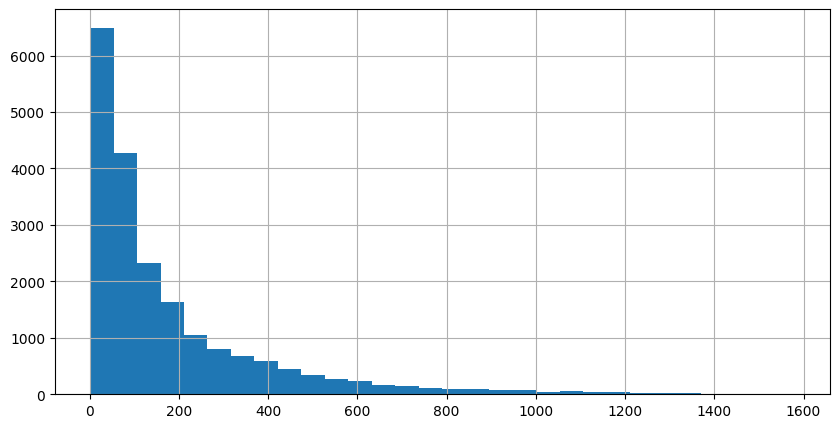

In [92]:
data['days_exposition'].hist(bins=30, figsize=(10,5))
plt.show();

На данных имеется два пиковых значения: на 45 и 60 дни. Возможно в эти дни система убирает с показа бесплатные объявления о продаже квартир.

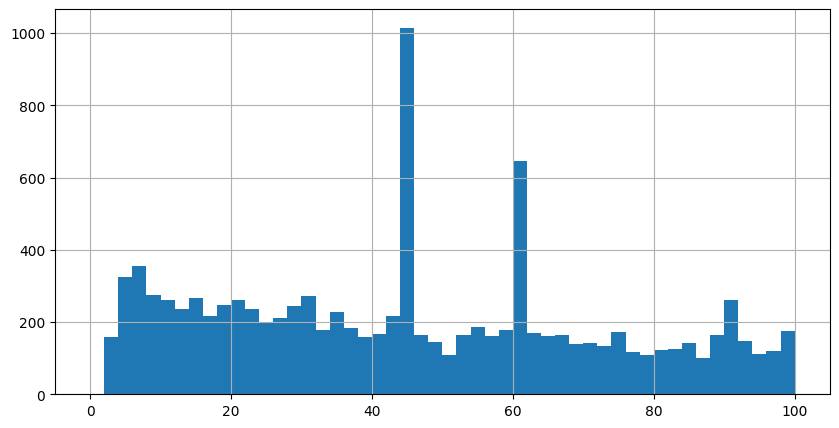

In [93]:
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(10,5))
plt.show();

In [49]:
data['days_exposition'].describe()

count    20191.000000
mean       179.561290
std        218.377532
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем на продажу уходит около 180 дней, тогда как 50% объявлений закрываются примерно за три месяца.

Продажу занявшую менее 45 дней можно считать быстрой, а более 230 необычно долгой.

#### Факторы, которые больше всего влияют на общую стоимость объекта

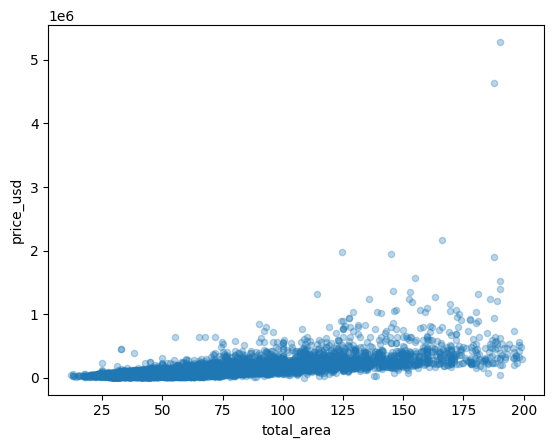

In [95]:
data.plot(x='total_area', y='price_usd', kind='scatter', alpha=0.3) 
plt.show();

In [51]:
data['price_usd'].corr(data['total_area'])

0.6585455532375334

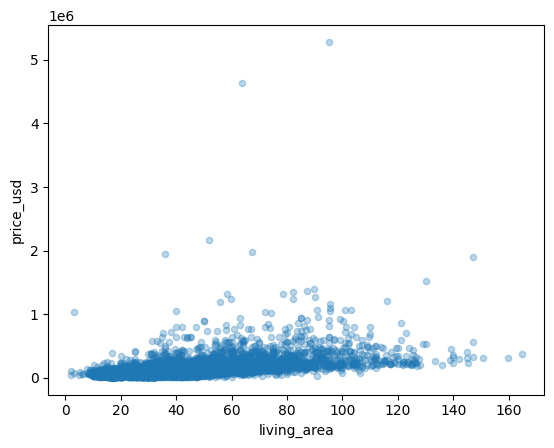

In [96]:
data.plot(x='living_area', y='price_usd', kind='scatter', alpha=0.3)
plt.show();

In [53]:
data['price_usd'].corr(data['living_area'])

0.5408479042955622

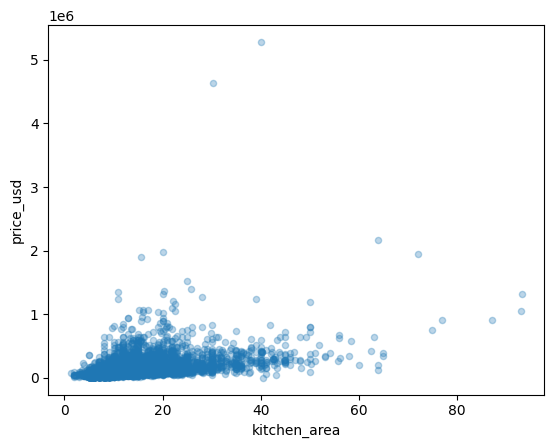

In [97]:
data.plot(x='kitchen_area', y='price_usd', kind='scatter', alpha=0.3)
plt.show();

In [55]:
data['price_usd'].corr(data['kitchen_area'])

0.5192824509188716

In [56]:
grouped_rooms = data.pivot_table(index='rooms', values='price_usd')

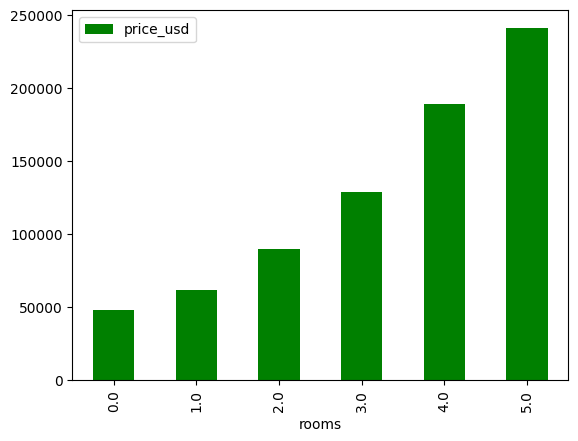

In [57]:
grouped_rooms.plot(kind='bar', color='green')
plt.show();

In [58]:
grouped_fl_types = data.pivot_table(index='floor_type', values='price_usd').sort_values(by='price_usd')

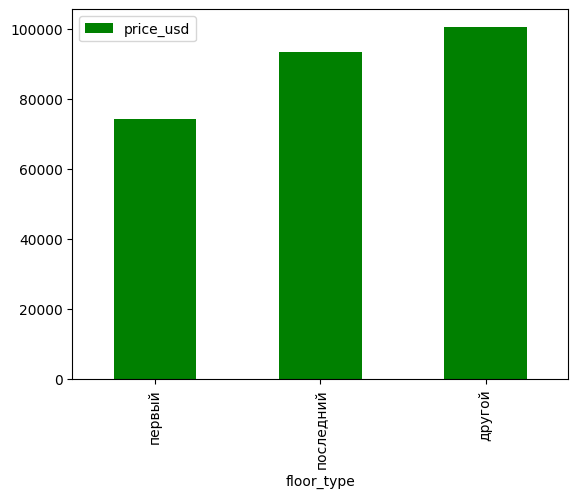

In [59]:
grouped_fl_types.plot(kind='bar', color='green')
plt.show();

In [60]:
grouped_days = data.pivot_table(index='day', values='price_usd').sort_values(by='day')

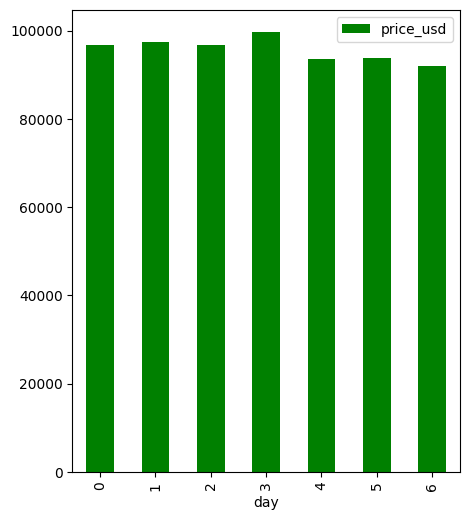

In [61]:
grouped_days.plot(kind='bar', color='green', figsize=(5,6))
plt.show();

In [62]:
grouped_months = data.pivot_table(index='month', values='price_usd')

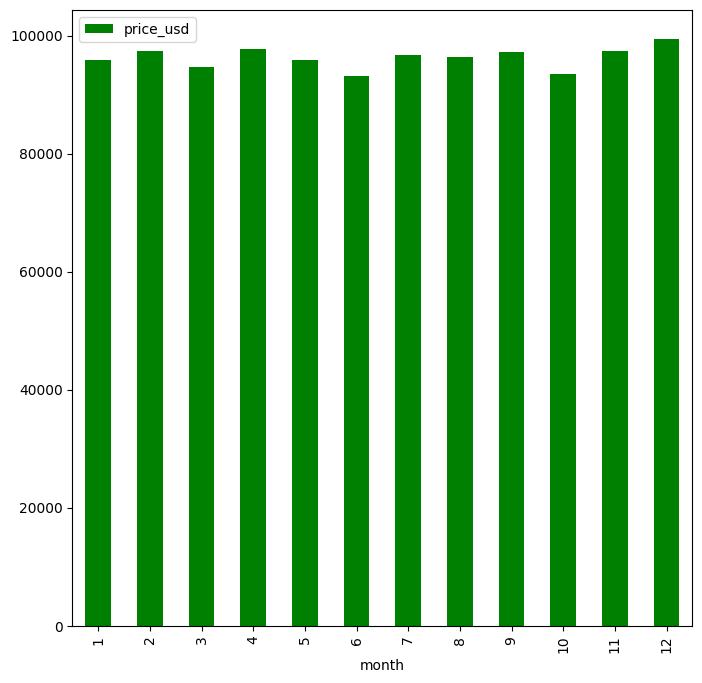

In [63]:
grouped_months.plot(kind='bar', color='green', figsize=(8,8))
plt.show();

In [64]:
grouped_years = data.pivot_table(index='year', values='price_usd')

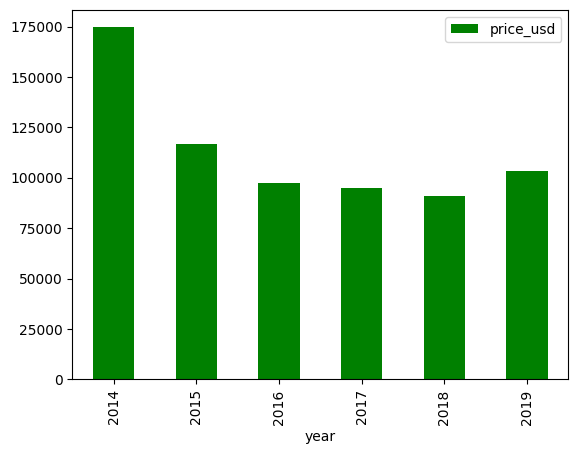

In [65]:
grouped_years.plot(kind='bar', color='green')
plt.show();

**Промежуточные выводы по факторам, которые больше всего влияют на общую стоимость объекта:**

* Ожидаемо наибольшая корреляция выражена между стоимостью и площадью жил. площади (и площадями кухни и жил. зоны как закономерное продолжение общей площади жилья). 
* Также очевидна корреляция между стоимостью и количеством комнат в жил. площади.
* Стоимость первых и последних этажей как правило ниже, чем промежуточных вариантов.
* Существенной зависимости стоимости от дня недели и/или месяца не наблюдается.
* В 2014 году стоимость была выше, чем в последующих годах. С 2015 по 2018 наблюдался негативный тренд, который закончился в 2019 году.

#### Средняя цена квадратных метров в населённых пунктах с наибольшим числом объявлений

In [66]:
sq_stat_table = data.pivot_table(index='locality_name', values='sq_cost',
                                aggfunc=['mean', 'count'])

In [67]:
top_10_localities = sq_stat_table.sort_values(by=('count', 'sq_cost'), ascending=False).head(10)
top_10_localities

,mean,count
,sq_cost,sq_cost
locality_name,,
Санкт-Петербург,1817.037513,15405
поселок Мурино,1370.073188,552
поселок Шушары,1256.821526,439
Всеволожск,1098.471583,398
Пушкин,1649.960687,364
Колпино,1205.332522,337
поселок Парголово,1445.316166,326
Гатчина,1099.938274,307


In [68]:
# Населённый пункт с максимальной ценой
highest_price = sq_stat_table[('mean', 'sq_cost')].idxmax() 
highest_price

'Зеленогорск'

In [69]:
# Населённый пункт с минимальной ценой
lowest_price = sq_stat_table[('mean', 'sq_cost')].idxmin()
lowest_price

'деревня Старополье'

Санкт-Петербург ожидаемо возглавляет список населённых пунктов с наибольшим числом объявлений. Зеленогорск являетмя населённым пунктом с максимальной ценой за квадратный метр, в то время как деревня Старополье - с минимальной.

#### Стоимость объектов недвижимости в Санкт-Петербурге на разном удалении от центра

In [70]:
st_peter = data.query('locality_name == "Санкт-Петербург"')

In [71]:
price_from_center = st_peter.pivot_table(index='km_to_center', values='price_usd')
price_from_center

,price_usd
km_to_center,
0.0,380880.721920
1.0,260861.581727
2.0,217014.158322
3.0,164838.275341
4.0,172679.997979
5.0,184140.266537
6.0,198624.256969
7.0,217955.693034
8.0,142849.012879


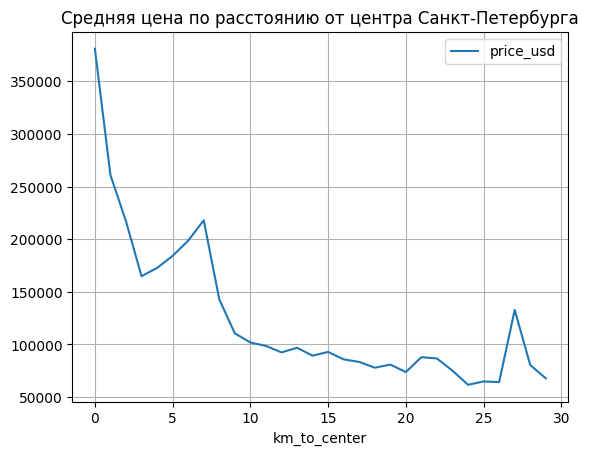

In [72]:
price_from_center.plot(kind='line', grid=True, title='Средняя цена по расстоянию от центра Санкт-Петербурга')
plt.show();

In [73]:
st_peter['km_to_center'].corr(data['price_usd'])

-0.33345199175870754

Несмотря на то, что в данных имеются несколько пиковых значений общая тенденция очевидна: чем дальше от центра Питера, тем ниже цена.

### Общий вывод

Проведён анализ данных о недвижимости, включающий предобработку, расчёт дополнительных параметров и исследовательский анализ.

1) Предобработка:

* Устранены пропуски (например, отсутствие балконов заменено на "0").
* Преобразованы типы данных, исправлены дубликаты в названиях населённых пунктов.

2) Добавленные параметры:

`Стоимость квадратного метра`, `дата публикации (день, месяц, год)`, `расстояние до центра в километрах`, `тип этажа`, `ценна в USD`.

3) Ключевые результаты:

* Популярны квартиры с площадью 35–50 кв.м, кухней 5–10 кв.м и высотой потолков менее 3 м.
* Большинство объявлений относится к одно- и двухкомнатным квартирам в пяти- и девятиэтажных домах.
* Продажи занимают в среднем 180 дней, быстрыми считаются менее 45 дней, долгими — более 230.

4) Факторы стоимости:

* Основное влияние оказывают площадь, количество комнат и этаж. Стоимость квартир на первых и последних этажах ниже, чем на промежуточных.
* Зависимости цены от дня недели и месяца размещения не выявлено.
* В 2014 году стоимость была выше, чем в последующие годы, с негативным трендом до 2018 года, который сменился ростом в 2019.
* Цена ожидаемо снижается с удалением от центра Санкт-Петербурга.
* Самый дорогой квадратный метр в Зеленогорске, самый дешёвый — в деревне Старополье.

**Анализ выявил ключевые рыночные тенденции, заложив основу для дальнейшего изучения спроса и ценообразования.**